<a data-flickr-embed="true"  href="https://www.flickr.com/photos/155335734@N04/41452472841/in/photolist-26a1KZB-a6MhGf-rqgvmv-24yjAHW-qPMmxy-zKaHfp-iTmpzN-A4fTFc-zHqd2M-A3sn5e-zZKYHU-a2F4GW-zKqZB3-zJwWNu-A1Y2n7-rqfkbT-A3iDDm-zLP9fW-zYBcGJ-z6bqS4-zHv1KD-A37B5i-zHDBrf-zKwfgx-z8ptBp-A42DEt-A58hy6-z7qK9m-z7thUv-zKu3tu-zKsiC1-z7cPqH-zLPPpA-zZM9Dd-zLj6Y7-z62CN7-zMiD5n-A44fZz-z6byjZ-zMSmtm-zPAve7-zKGTgK-z6daHH-zKwD7S-zKu5d1-rDr27o-A4QEfx-A3S8Gw-A1Nv81-rpuQH5" title="Michelangelo&#x27;s David"><img src="https://farm1.staticflickr.com/896/41452472841_603d7dbcf8.jpg" width="500" height="375" alt="Michelangelo&#x27;s David"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

# Voxelization of Michelangelo's David

Suppose you wanted to voxelize Michelangelo's David.  Our voxel:  the space-filling rhombic dodecahedron (RD) encasing each uniform-sized ball in a voxel matrix.

In reality the ball light sources may consist mostly of unoccupied space or gas, consistent with the idea of an octet-truss wherein slender rods link to a minimally sized hub, as in Zometool or vZome (a virtualization).

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/42241528181/in/photolist-22Tq2ju-5y8idx-27mJSE2-KdPHDE-279TEzK-279TEeK-25MGEDT-25MGEoH-CwvwpP-g2w6Kf-9WvZKt-9dSGxn-8dUDpo-7tqppn-7tq2Rp-7qH7kr-669WKs-65aCay-5Dvfav" title="Space-filling with Rhombic Dodecahedrons"><img src="https://farm1.staticflickr.com/967/42241528181_a7333ae2ed.jpg" width="500" height="312" alt="Space-filling with Rhombic Dodecahedrons"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Regardless of the actual size of the lightbulbs, the containing voxels, the polyhedral voronoi cells will be flat against one another, face to face, with no space left over.  That's what it means to say polyhedrons are space-filling:  they jam together without gaps.  Like bricks.

Kepler was especially fond of the RD for this very reason, that it's a space-filler.  In our "Sesame Street" Concentric Hierarchy, it has a canonical volume of six, twice that of the cube made from the twelve inscribed short diagonals.

The twelve diamonds of the RD, being rhombi, and not squares, have long and short diagonals criss-crossing at their face centers.  These diagonals terminate in what we might call the "sharp" and "shallow" vertexes respectively.  A diamond shape has shallow angles that are wider, in terms of degrees, than its narrower or sharper angles, of fewer degrees.

At the sharp vertexes, four faces come together, whereas at the shallow vertexes, only three.

In our reference design, the twelve long diagonals define an octahedron of relative volume 4:6 or 2/3rds.  The octahedron consisting of RD long diagonals has a volume 2/3rds that of the original RD, while the cube made of short diagonals has a volume of precisely 1/2 that of the original RD.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/4310129635/in/album-72157623211669418/" title="Version 0"><img src="https://farm5.staticflickr.com/4013/4310129635_4745a318ee.jpg" width="500" height="375" alt="Version 0"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

The [octet-truss](http://grunch.net/synergetics/octet.html) locates hubs at the RD centers and consists of rods radiating outward to twelve neighors, unless at a boundary.  

Flextegrity manages the matrix differently, by affixing the connecting rods to the faces or edges of larger hubs, leaving centers free for other apparatus (such as lightbulbs and circuitry).  The Flextegrity hub is often an icosahedron.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/4248447415/in/album-72157623211669418/" title="2F Tetrahedron"><img src="https://farm5.staticflickr.com/4043/4248447415_be03908737.jpg" width="500" height="457" alt="2F Tetrahedron"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Our method will be to assess the volume displacement of a minitiature 3D printed David and then scale up as a 3rd power of the linear ratio, i.e. height_original / height_model to the 3rd power, times volume_model, will give use volume_original.

$V_o = (V_m)(H_o/H_m)^3$

The next computation is to take $V_o$ and divide it into N voxels of some radius, where radius is from the RD center to any of its face centers.  

Again, R is not with respect to anything physical other than it's half the distance between two RD centers.  

These RD shaped voronoi cells are imaginary compartments, at the center of which we may place any kind of hub.  Our goal is to get an approximate count of the number of hubs.  We assume one hub per RD without needing to think about density e.g. how much of the RD is actually filled with physical material.

Lets assume the diameter of a baseball as our RD center inter-distance.  Imagine filling space of voxels each encasing a baseball, each of which is tangent to twelve around it at the twelve "kissing point" centers of the rhombic (diamond) faces.  

![Closest Packed Baseballs](https://mlblogssnaggingbaseballs.files.wordpress.com/2008/11/pyramid321.jpg)

[2,870 baseballs](https://mlblogssnaggingbaseballs.wordpress.com/tag/baseball-pyramid/) 

[OEIS A000330](http://oeis.org/A000330)

In [1]:
def square_nums(n):
    return n**2

def partial_sums(num):
    squares = []
    partials = [ ]
    for i in range(1, num):
        squares.append(square_nums(i))
        partials.append(sum(squares)) # partial sums of 2nd powers
    return partials

print(partial_sums(21), end=" ")

[1, 5, 14, 30, 55, 91, 140, 204, 285, 385, 506, 650, 819, 1015, 1240, 1496, 1785, 2109, 2470, 2870] 

What is the diameter of a baseball in centimeters?  Lets go with 7.4 cm based on [this source](https://hypertextbook.com/facts/2009/RickyHe.shtml).

What is the height of [the original David](http://ringlingdocents.org/sculpture/david-height.htm) in Florence, Italy?  517 cm.

What is the height of the 3D printed model of David? 10 cm.

What is the 3rd power scale factor we need to apply to $V_m$?

In [2]:
scale_factor = (517/10)**3
print("Factor to multiply by model David's volume in cm3: {:10.3f}".format(scale_factor))

Factor to multiply by model David's volume in cm3: 138188.413


What is the volume of the model David?  TBD

What is the [volume of the original David](http://www.graphics.stanford.edu/projects//mich/other-body-parts/other-body-parts.html)?  2.16 m3 i.e. [2,160,000 cm3](https://www.metric-conversions.org/volume/cubic-meters-to-cubic-centimeters.htm).

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/29437945807/in/dateposted-public/" title="david_3d_printed"><img src="https://farm2.staticflickr.com/1860/29437945807_e919271d75.jpg" width="500" height="271" alt="david_3d_printed"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

[Michelangelo's David for 3D Printer](https://www.myminifactory.com/object/3d-print-michelangelo-s-david-in-florence-italy-2052)

Our technique will be to start with the number of cubic centimeters in the original David, a figure we might obtain directly, by searching, thereby short circuiting the 3D printing and displacement step.  

However for generic objects, a 3D printed approximation with water displacement and then a scale factor applied, may be the most practical way to get a measure.

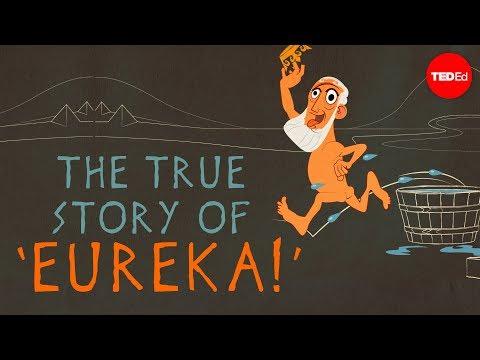

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("0v86Yk14rf8")

If we take a D = two centimeter edge tetrahedron and call that our unit, six of which then form a rhombic dodecahedron, and then apply 1/S3, a conversion constant, we'll have a corresponding cubic volume measure. 

Dividing our total volume by the voxel volume gives the number of [voronoi cells](https://en.wikipedia.org/wiki/Georgy_Voronoy), or voxels.  That's assuming a two centimeter long face diagonal.  

However, that was not our initial assumption, as a baseball has a diameter of 7.4 cm.  Lets set R = 1 cm (a reference sphere radius) and D = 2 cm (the same sphere's diameter), but have our larger baseball diameter in terms of D (2 cm intervals).

The tetrahedron of edges 7.4/2 or 3.7 D, will be a 1/6th of the RD in question.  That's thinking in tetravolumes, units smaller than R-edged cubes.  

The R-cube to D-tetrahedron ratio is what we call S3 or $\sqrt{9/8}$.  We switch back and forth between these two units of volume by means of this constant.  This practice derives from Buckminster Fuller's *Synergetics: Explorations in the Geometry of Thinking*.

Tetravolumes times 1/S3 then gives the equivalent volume in plain old cubic centimeters (cm3).

A tetrahedron of edges 7.4 cm has a tetravolume of $(7.4/2)^3$ meaning the RD-shaped voronoi cell surrounding the baseball would have a conventional cubic centimeter volume of...

In [4]:
S3 = (9/8)**(1/2)
RD_cm3 = (1/S3) * 6 * (7.4/2) ** 3  # 2 cm unit i.e. 2R
print("Voronoi Cell volume in cubic centimeters (cm3): ", RD_cm3)

Voronoi Cell volume in cubic centimeters (cm3):  286.5366382995376


In [5]:
from math import ceil
conversion = 100**3 # cubic centimeters
david_cm3 = 2.16 * conversion
N = ceil(david_cm3 / RD_cm3) # round up
print("Number of Voxels per Original David = ~{:,}".format(N))

Number of Voxels per Original David = ~7,539


*RESULT*:  It'd take about seven thousand five hundred and forty voxels of the size needed to enclose a baseball to space-fill the volume occupied by the original David statue by Michelangelo.